In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"
num_classes = 10

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical"
)

Found 837 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


Found 97 images belonging to 10 classes.


In [13]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[100,100,3]),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3840128   
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,857,930
Trainable params: 3,857,930
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50


2023-09-07 01:34:54.348815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - ETA: 0s - loss: 8.1960 - accuracy: 0.1180

2023-09-07 01:35:27.396144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 37s 1s/step - loss: 8.1960 - accuracy: 0.1180 - val_loss: 3.3844 - val_accuracy: 0.2292
Epoch 2/50
26/26 [==============================] - 34s 1s/step - loss: 2.8339 - accuracy: 0.2174 - val_loss: 2.3488 - val_accuracy: 0.2812
Epoch 3/50
26/26 [==============================] - 34s 1s/step - loss: 2.1928 - accuracy: 0.2882 - val_loss: 2.1397 - val_accuracy: 0.3021
Epoch 4/50
26/26 [==============================] - 33s 1s/step - loss: 2.1689 - accuracy: 0.2758 - val_loss: 1.9975 - val_accuracy: 0.4271
Epoch 5/50
26/26 [==============================] - 33s 1s/step - loss: 2.0533 - accuracy: 0.3106 - val_loss: 1.6458 - val_accuracy: 0.4792
Epoch 6/50
26/26 [==============================] - 33s 1s/step - loss: 1.9157 - accuracy: 0.3466 - val_loss: 2.1676 - val_accuracy: 0.3958
Epoch 7/50
26/26 [==============================] - 33s 1s/step - loss: 2.2004 - accuracy: 0.3366 - val_loss: 1.5025 - val_accuracy: 0.4062
Epoch 8/50
26/26 [=============

In [17]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,8.196032,0.118012,3.384420,0.229167
1,2.833889,0.217391,2.348847,0.281250
2,2.192806,0.288199,2.139717,0.302083
3,2.168916,0.275776,1.997517,0.427083
4,2.053330,0.310559,1.645759,0.479167
5,1.915734,0.346584,2.167567,0.395833
6,2.200373,0.336646,1.502496,0.406250
7,1.869676,0.388820,1.427281,0.531250
8,1.834364,0.380124,1.404296,0.541667
9,1.784355,0.416149,1.511551,0.437500


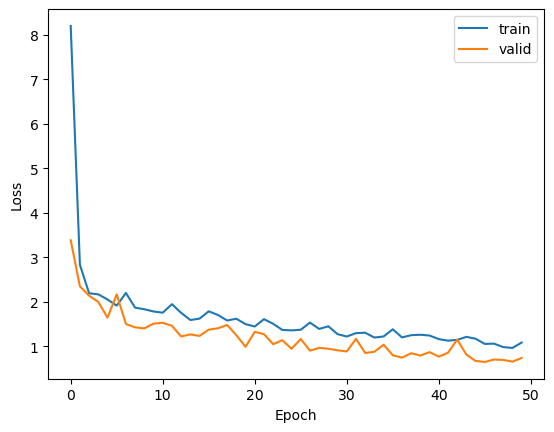

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

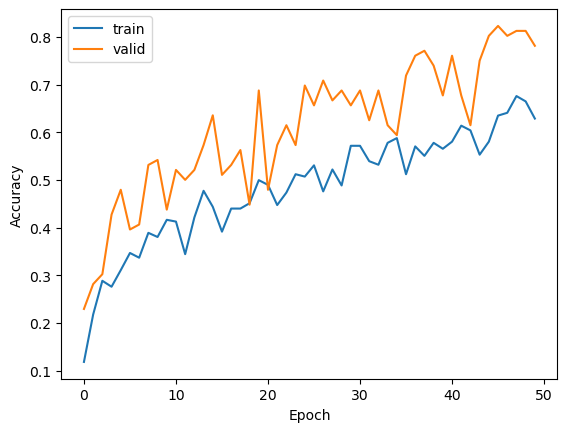

In [19]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [20]:
preds = model.predict(test_generator)

2023-09-07 02:05:53.878848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 4s 1s/step


In [21]:
y_pred = np.argmax(preds, axis=1)

In [22]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : grapes
3 : kiwi
4 : mango
5 : orange
6 : pear
7 : pineapple
8 : pomegranate
9 : watermelon


In [23]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "grapes",
    3 : "kiwi",
    4 : "mango",
    5 : "orange",
    6 : "pear",
    7 : "pineapple",
    8 : "pomegranate",
    9 : "watermelon"
}

In [24]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [25]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       0.40      1.00      0.57         4
      banana       0.78      0.64      0.70        11
      grapes       0.90      0.90      0.90        10
        kiwi       0.90      0.90      0.90        10
       mango       0.50      1.00      0.67         5
      orange       0.80      0.62      0.70        13
        pear       1.00      0.71      0.83        14
   pineapple       0.80      0.73      0.76        11
 pomegranate       0.80      0.80      0.80        10
  watermelon       0.90      0.82      0.86        11

    accuracy                           0.78        99
   macro avg       0.78      0.81      0.77        99
weighted avg       0.83      0.78      0.79        99



In [27]:
model.save("mlp.h5")